# Chapter 2 Linear Regression 

## Import Dataset 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ds/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


dataset size 

In [3]:
dataset.shape

(30, 2)

## Linear Regression 

* a simple linear regression is defined by the equation $y = b_0 + b_1x$
* $x$ is the independed variable and $y$ is a dependent variable 
* $b_0 ,b_1$ are constant coefficient
* in our case $x$ be the years of experience and $y$ be the salary, $b_0 , b_1$ defines the relation  
* in Linear regression the goal is to best fit a straight line on the scattered plot of dataset

## How Linear Regression works ? 

* the fitted curve gives $y' = b_0 + b_1x$ where the actual curve is $y = f(x)$
* thus the error $\epsilon = (y' - y) | x$
* the LR model tries to minimise $\epsilon$ iteratively to find best value for $ b_0 , b_1$ 

## Implement Simple Linear Regression 

### Perform Data preprocessing 

In [4]:
#separate dependent and independent variables

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

# perform train-test-split

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X_train.shape

(20, 1)

### Verify the Split

In [6]:
print(f'x_train size \t = {X_train.shape}')
print(f'x_test size \t = {X_test.shape}')
print(f'y_train size \t = {Y_train.shape}')
print(f'y_test size \t = {Y_test.shape}')

x_train size 	 = (20, 1)
x_test size 	 = (10, 1)
y_train size 	 = (20,)
y_test size 	 = (10,)


### Feature Scalling

feature scalling is taken care by the models itself thus no explicit feature scelling is needed 

### Perform Regression 
this section fits the traing set and the regression object learns the correlation between the X & Y 

In [7]:
# import the LR class
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()   # create an LR object 
regressor.fit(X_train, Y_train)  # fit the training data and build model  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predict Test Set observation 
* we'll create a vector of predicted salaries 
* compare with actual 

In [8]:
Y_pred = regressor.predict(X_test) # perform prediction

print(Y_pred) # observe prediction 

[ 90329.26994588  56076.98533315  53222.62828209  39902.29537714
  44659.55712891  93183.62699694  64640.05648633 116969.93575577
  63688.60413598  37999.39067643]


* Now compare the Y_pred (predicted salaries) and Y_test (real salaries). 
* here the relative error of individial data sample is tested 

In [9]:
import math
error_pct=[]
for i in range(len(Y_test)):
    error_pct.append(round(math.sqrt((Y_test[i] - Y_pred[i])**2)/Y_test[i] * 100, 3))
error_pct

[1.536, 2.997, 6.037, 5.755, 2.607, 5.179, 13.243, 3.849, 11.819, 17.759]

### Visualising Test and Predict sets

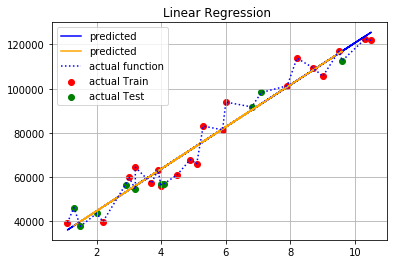

In [10]:
%matplotlib inline

plt.grid(True)
plt.title('Linear Regression ')
plt.xlabel='years of Experience'
plt.ylabel='Salary'

plt.scatter(X_train, Y_train, color = 'red' , label='actual Train') # plotting the train set
plt.scatter(X_test, Y_test, color = 'green' , label='actual Test') # plotting the train set
plt.plot(X_train, regressor.predict(X_train), color = 'blue' , label='predicted')
plt.plot(X_test, regressor.predict(X_test), color = 'Orange' , label='predicted')

plt.plot(X,Y, ':', color = 'blue', label='actual function')

plt.legend()
